In [4]:
import io
import numpy as np

In [5]:
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow_datasets as tfds

In [6]:
def _normalize_img(img, label):
    img = tf.cast(img, tf.float32) / 255.
    return (img, label)

train_dataset, test_dataset = tfds.load(name="fashion_mnist", split=['train', 'test'], as_supervised=True)

# Build your input pipelines
train_dataset = train_dataset.shuffle(1024).batch(32)
train_dataset = train_dataset.map(_normalize_img)

test_dataset = test_dataset.batch(32)
test_dataset = test_dataset.map(_normalize_img)

In [9]:
train_dataset

<MapDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>

In [11]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.optimizers import Adam


# load and normalize data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype('float32')
X_train /= 255.
X_test = X_test.astype('float32')
X_test /= 255.

# reshape input data
X_train = X_train.reshape(
    X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(
    X_test.shape[0], 28, 28, 1)


def create_model(image_input_shape):

    input_image = tf.keras.layers.Input(shape=image_input_shape)

    x = tf.keras.layers.Conv2D(32,
                                 (3, 3),
                                 input_shape=(28, 28, 1),
                                 activation='relu')(input_image)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    
    x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.3)(x)
        
    x = tf.keras.layers.Conv2D(128, 3, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dense(64)(x)
    x = tf.math.l2_normalize(x, axis=1)
    
    return tf.keras.models.Model(inputs=input_image, outputs=x)         

model = create_model((28, 28, 1))


model.compile(loss=tfa.losses.triplet_semihard_loss, optimizer=Adam(lr=0.001),
              metrics=['accuracy'], weighted_metrics=['accuracy'])



model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=20,
          batch_size=32,
          shuffle=True)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4692 - accuracy: 0.0341 - weighted_accuracy: 0.0341 - val_loss: 0.1071 - val_accuracy: 0.0559 - val_weighted_accuracy: 0.0559
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1817 - accuracy: 0.0343 - weighted_accuracy: 0.0343 - val_loss: 0.0728 - val_accuracy: 0.0023 - val_weighted_accuracy: 0.0023
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1528 - accuracy: 0.0050 - weighted_accuracy: 0.0050 - val_loss: 0.0647 - val_accuracy: 0.0014 - val_weighted_accuracy: 0.0014
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1365 - accuracy: 0.0044 - weighted_accuracy: 0.0044 - val_loss: 0.0684 - val_accuracy: 0.0012 - val_weighted_accuracy: 0.0012
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1297 - accuracy: 0.0027 - weighted_accuracy: 0.0027 - val_loss: 0.0600 - val_accuracy: 6.0000e-04 - val_we

In [12]:
model.save("my_h5_model.h5")

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=None), # No activation on final dense layer
    tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1)) # L2 normalize embeddings

])

In [19]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tfa.losses.TripletHardLoss())


In [20]:
# Train the network
history = model.fit(
    train_dataset,validation_data = test_dataset,
    epochs=201)

Epoch 1/201
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7460
Epoch 2/201
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6372
Epoch 3/201
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6038
Epoch 4/201
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5784
Epoch 5/201
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5588
Epoch 6/201
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5387
Epoch 7/201
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5204
Epoch 8/201
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5050
Epoch 9/201
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4925
Epoch 10/201
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4797
Epoch 11/201
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4677
Epoch 12/201
1875/1875 [==============================] - 8s 4ms/step - lo

Epoch 97/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1130
Epoch 98/201
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1163
Epoch 99/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1104
Epoch 100/201
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1086
Epoch 101/201
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1078
Epoch 102/201
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1093
Epoch 103/201
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1119
Epoch 104/201
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1040
Epoch 105/201
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1043
Epoch 106/201
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1031
Epoch 107/201
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1004
Epoch 108/201
1875/1875 [==============================] 

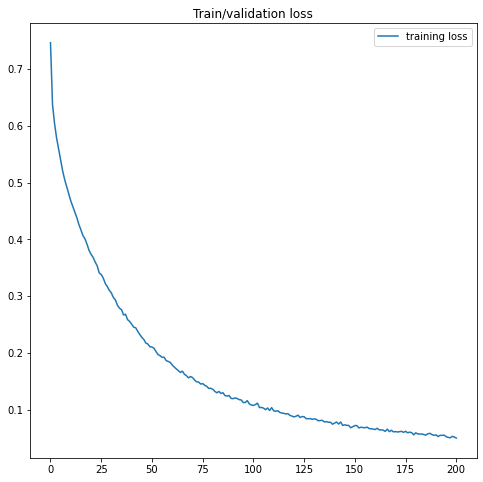

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], label='training loss')
#     plt.plot(H.history['val_loss'], label='validation loss')
plt.legend()
plt.title('Train/validation loss')
plt.show()

In [5]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tfa.losses.TripletSemiHardLoss())


In [6]:
history_2 = model.fit(
    train_dataset,
    epochs=201)

Epoch 1/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4835
Epoch 2/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3981
Epoch 3/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3670
Epoch 4/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3507
Epoch 5/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3344
Epoch 6/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3254
Epoch 7/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3155
Epoch 8/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3008
Epoch 9/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2948
Epoch 10/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2860
Epoch 11/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2808
Epoch 12/201
1875/1875 [==============================] - 9s 5ms/step - lo

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0319
Epoch 193/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0344
Epoch 194/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0314
Epoch 195/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0324
Epoch 196/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0326
Epoch 197/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0330
Epoch 198/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0316
Epoch 199/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0302
Epoch 200/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0345
Epoch 201/201
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0313


In [8]:
model.save("my_h5_model.h5")

# It can be used to reconstruct the model identically.
reconstructed_model = tf.keras.models.load_model("my_h5_model.h5")
